#### <center> Implemetation du algorithme de bellman </center>

##### importation des bibliotheque

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

##### implementation de l'algorithme de Bellman

In [28]:
def Bellman(graph, start):
    # On initialise la distance de chaque nœud à l'infini
    distance = {node: float('infinity') for node in graph.nodes}
    distance[start] = 0

    # On récupère les arêtes du graphe
    edges = graph.edges(data=True)

    # On effectue n-1 itérations
    for _ in range(len(graph.nodes) - 1):
        for u, v, data in edges:
            # On met à jour la distance de chaque nœud
            if distance[v] > distance[u] + data['weight']:
                distance[v] = distance[u] + data['weight']

    # On vérifie s'il y a un cycle de poids négatif
    for u, v, data in edges:
        if distance[v] > distance[u] + data['weight']:
            print('Le graphe contient un cycle de poids négatif')
            return

    return distance

##### On crée un graphe pour tester l'algorithme 

In [29]:

g = nx.Graph()

# On ajoute des arêtes au graphe (nœud1, nœud2, poids)
g.add_edge('A', 'B', weight=1)
g.add_edge('B', 'C', weight=2)
g.add_edge('C', 'D', weight=12)
g.add_edge('D', 'A', weight=4)
g.add_edge('A', 'C', weight=5)
g.add_edge('B', 'D', weight=6)


##### On affiche le graphe original

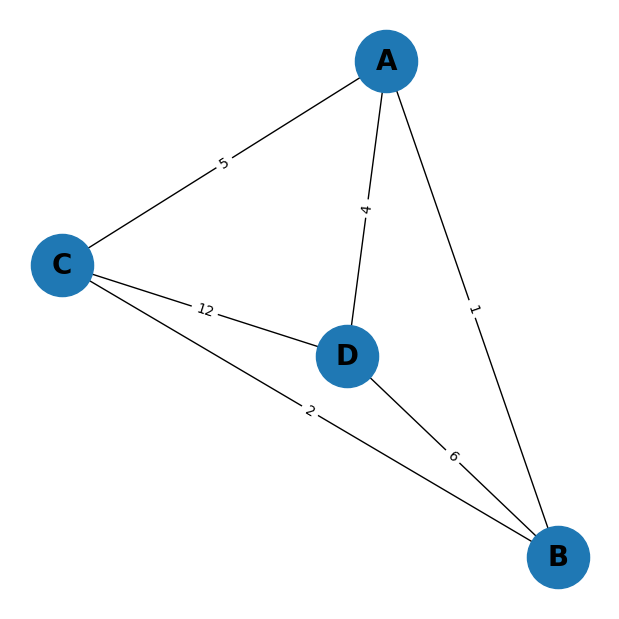

In [30]:
plt.figure(figsize=(6, 6))  # On cree une nouveau figure
pos = nx.spring_layout(g)  # On calcule la position des noued
nx.draw(g, pos, with_labels=True, node_size=2000, font_size=20, font_weight='bold')

# On ajoute les cout des noued a la figure
edge_labels = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos=pos, edge_labels=edge_labels)

plt.show()  # On affiche l'image

#### On applique l'algorithme de Bellman sur le graphe

In [31]:
distances = Bellman(g, 'A')

# On affiche les distances
for node, distance in distances.items():
    print(f'Distance minimal de A à {node} : {distance}')

Distance minimal de A à A : 0
Distance minimal de A à B : 1
Distance minimal de A à C : 3
Distance minimal de A à D : 4
